In [10]:
%load_ext autoreload
%autoreload 2

# --- imports --

import importlib
import glucose_functions as glucose 

# To reload the python files that are implemented.
importlib.reload(glucose)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Degradation of Glucose

We will analyze the 2D glucose model:
$$
\begin{cases}
X'=-X+aY+X^2Y\\
Y'=b-aY-X^2Y
\end{cases}
$$
in the window $X\in[0,4]$, $Y\in[0,7]$ with $a, b >0$.

The goal of this part is to build the *qualitative phase portrait*: nullclines, equilibrium location, and arrow directions on/around the nullclines.


In [6]:
a , b, x_lim, y_lim = glucose.default_parameters()


## 1.1 Nullclines and local flow directions

Setting each derivative to zero gives the nullclines. Given the equations we saw earlier, with $a=0.06$, $b=0.4$, we have:
- **$X$-nullcline** ($X'=0$):
$$
-X+(a+X^2)Y=0 \;\Rightarrow\; Y=\frac{X}{a+X^2}.
$$
- **$Y$-nullcline** ($Y'=0$):
$$
b-(a+X^2)Y=0 \;\Rightarrow\; Y=\frac{b}{a+X^2}.
$$

Their intersection is the equilibrium:
$$
X_{eq}=b,\qquad Y_{eq}=\frac{b}{a+b^2}.
$$

In this first step we build the **phase–plane skeleton** of the model by plotting the **nullclines** ($X'=0$ and $Y'=0$) for the specific parameter choice $a=0.06$, $b=0.4$. Then we will annotate the plot with **direction vectors / sign changes** in each region separated by the nullclines (including *on* the nullclines), restricted to $X\in[0,4]$ and $Y\in[0,7]$.

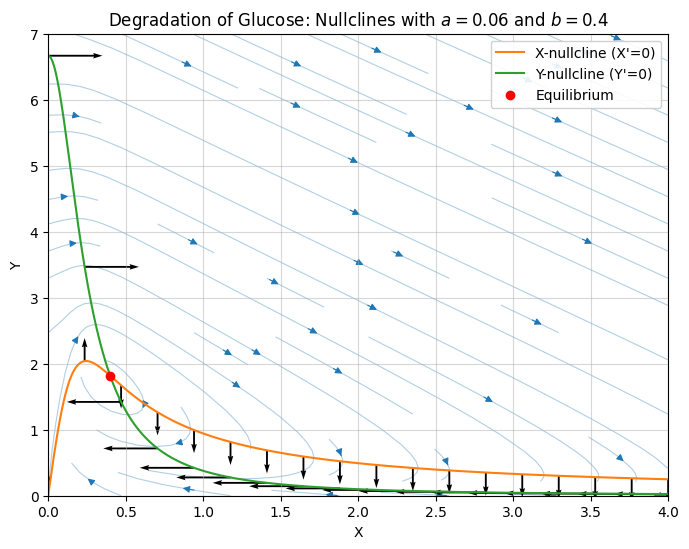

In [23]:
glucose.plot_nullclines(a=0.06, b=0.4, xlim=(0, 4), ylim=(0, 7), n=250, arrows=18)

We see a spiral equilibrium at $(X_{eq}, Y_{eq})\approx (0.4, 1.8)$, but we can't tell if its a stable or unstable spiral yet.

### Flow directions on the nullclines
On a nullcline, one component is zero, so the flow is constrained:

- On the **$X$-nullcline** ($X'=0$), vectors are **vertical** and
$$
Y' = b-(a+X^2)Y = b - (a+X^2)\frac{X}{a+X^2} = b-X.
$$
So: $X<b$ gives arrows **up**, $X>b$ gives arrows **down**.

- On the **$Y$-nullcline** ($Y'=0$), vectors are **horizontal** and
$$
X' = -X+(a+X^2)Y = -X+(a+X^2)\frac{b}{a+X^2}=b-X.
$$
So: $X<b$ gives arrows **right**, $X>b$ gives arrows **left**.



**At $X=b$ the direction flips — exactly where the equilibrium sits.**

## 1.2 Equilibria and their type

Here we compute the **equilibrium point** of the nullclines we found earlier and classify it into types such as **stable/unstable node, saddle, spiral/focus**, and others using the Jacobian eigenvalues


Using the equilibrium from 1.1,
$$
(X_{eq},Y_{eq})=\left(b,\frac{b}{a+b^2}\right),
$$
we classify its local behavior by linearizing the system. The Jacobian is
$$
J(X,Y)=
\begin{pmatrix}
-1+2XY & a+X^2\\
-2XY & -(a+X^2)
\end{pmatrix}.
$$


The eigenvalues of $J_{eq}=J(X_{eq},Y_{eq})$ determine the local type:
- $\det(J_{eq})<0$: saddle.
- $\det(J_{eq})>0$ and $\mathrm{tr}(J_{eq})<0$: stable node/focus.
- $\det(J_{eq})>0$ and $\mathrm{tr}(J_{eq})>0$: unstable node/focus.
- Node vs focus is decided by the discriminant $D=\mathrm{tr}(J_{eq})^2-4\det(J_{eq})$:
  - $D>0$: node (real eigenvalues),
  - $D<0$: focus/spiral (complex conjugate eigenvalues).

!

!

!

In [24]:
if __name__ == "__main__":
    (Xeq, Yeq), J, eig = glucose.get_equilibrium_eigvals(a=0.06, b=0.4)
print(f"Equilibrium at (Xeq, Yeq) = ({Xeq:.4f}, {Yeq:.4f})\n")
print("Jacobian at equilibrium:")
print(J)
print("\nEigenvalues of Jacobian:")
print(eig)

Equilibrium at (Xeq, Yeq) = (0.4000, 1.8182)

Jacobian at equilibrium:
[[ 0.45454545  0.22      ]
 [-1.45454545 -0.22      ]]

Eigenvalues of Jacobian:
[0.11727273+0.45414437j 0.11727273-0.45414437j]


The eigenvalues at equilibrium are $(0.12 + 0.45i)$ and $(0.12 - 0.45i )$, thus they have the same real part and an oppisite imaginary part. This mean we are dealing with ...

!

!

!

!

## 1.3 Trajectories and qualitative behavior

In this part we study how solutions evolve in the phase plane by integrating the glucoose model for multiple initial conditions within the window $X\in[0,4]$, $Y\in[0,7]$.

 We include initial conditions close to the equilibrium $(X_{eq},Y_{eq})=\left(b,\frac{b}{a+b^2}\right)$ to probe the local stability predicted by the Jacobian, and initial conditions near the boundaries of the domain to capture the global flow structure. Trajectories are plotted on top of the nullclines and vector field, and we compare whether they are attracted to or repelled from the equilibrium, whether they spiral or approach along preferred directions, and whether they cross the nullclines consistently with the sign structure of $(X',Y')$.


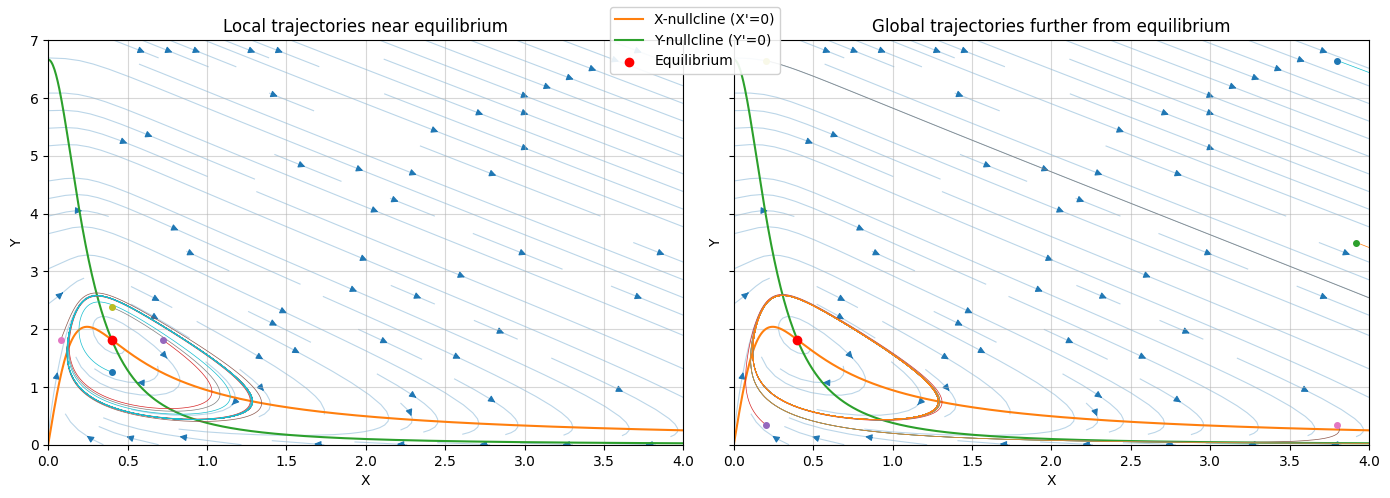

In [27]:
glucose.plot_2glucose_trajectories(arrows=0, t_span=(0,60), t_eval_n=5000,)

The trajecories seem to go to some stable spiral cycle. When they are placed to close to the equilibrium, they converge to a stable spiral further away. On the plot wheree the trajectories are started a bit further, they also coonverge to that stable spiral.

Because that spiral seems interesting to us, we will take a closer look.

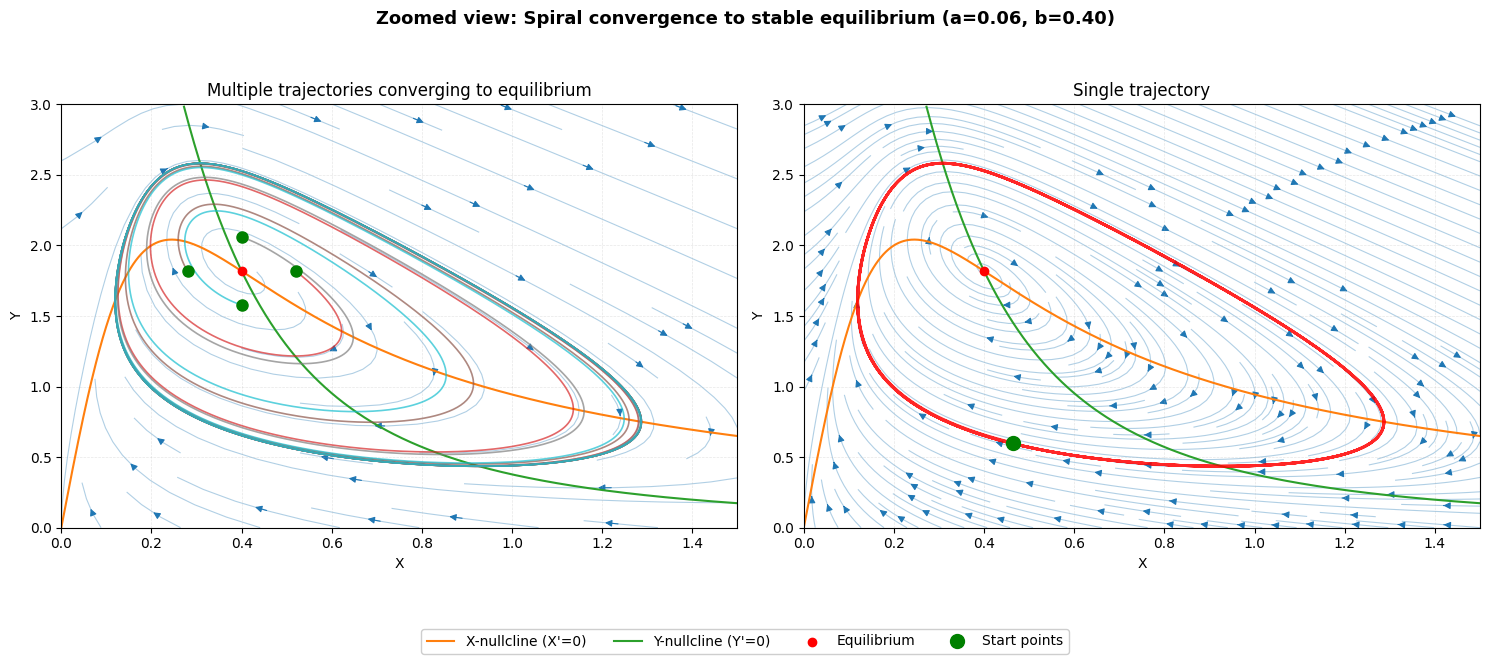

In [37]:
glucose.plot_zoomed_spiral_convergence(a=a, b=b, xlim=(0, 1.5), ylim=(0, 3), 
                                       t_span=(0, 60), t_eval_n=2500, step=0.08,
                                       single_init=(0.465, 0.6))

## 1.4 Bifurcations when varying $b$

In this part we treat $b$ as a control parameter and sweep $b\in[0,1.2]$ while keeping $a$ fixed. We will track how equilibria (their number and stability) change, locate the **critical parameter value(s)** where the qualitative dynamics changes, and name/explain the **bifurcation type**.

With $a$ fixed, the equilibrium moves as
$$
X_{eq}(b)=b,\qquad Y_{eq}(b)=\frac{b}{a+b^2}.
$$

### Bifurcation condition

Stability changes occur when the real part of the eigenvalues crosses zero. Since $\det(J_{eq})>0$ (for $a>0$), a stability switch is captured by the trace condition
$$
\tau(b)=\mathrm{tr}(J_{eq})=0.
$$

Solving this gives the critical $b$-value(s) where the equilibrium changes from stable to unstable (or vice versa). Representative phase portraits/trajectories on both sides of the critical values are used to illustrate the qualitative change.


### Mathematical Background: Hopf Bifurcation Theory

A **bifurcation** occurs when small changes in a parameter cause a qualitative change in system behavior. For the glucose model with fixed $a$, the key parameter is $b$ (glucose production rate).

**Stability condition**: The equilibrium is **stable** if all eigenvalues of the Jacobian have negative real parts, i.e., $\max(\text{Re}(\lambda)) < 0$.

**Bifurcation occurs when**: $\tau(b) = \mathrm{tr}(J_{eq}) = 0$

This happens because:
- The product of eigenvalues: $\det(J_{eq}) = a + b^2 > 0$ (always positive for $a > 0$)
- If $\tau = \lambda_1 + \lambda_2 = 0$ with $\det > 0$, then $\lambda_{1,2} = \alpha \pm i\beta$ (complex conjugates)
- Crossing $\tau = 0$ means eigenvalues cross the imaginary axis → **Hopf bifurcation** (oscillatory instability)

**Finding critical $b$ values**:

From $\tau(b) = 1 - (a+b^2) - \frac{2a}{a+b^2} = 0$, we get:

$$s^2 - s + 2a = 0 \quad \Rightarrow \quad s = \frac{1 \pm \sqrt{1-8a}}{2}$$

where $s = a + b^2$. Converting back: $b_{\pm} = \sqrt{s_{\pm} - a}$

**Bifurcation structure** (for $0 < a < 1/8$):
- **Region I** ($b < b_-$): Unstable equilibrium → oscillations
- **Region II** ($b_- < b < b_+$): **Stable equilibrium** → convergence to fixed point  
- **Region III** ($b > b_+$): Unstable equilibrium → oscillations

This explains how the system can exhibit different behaviors depending on the glucose production rate!


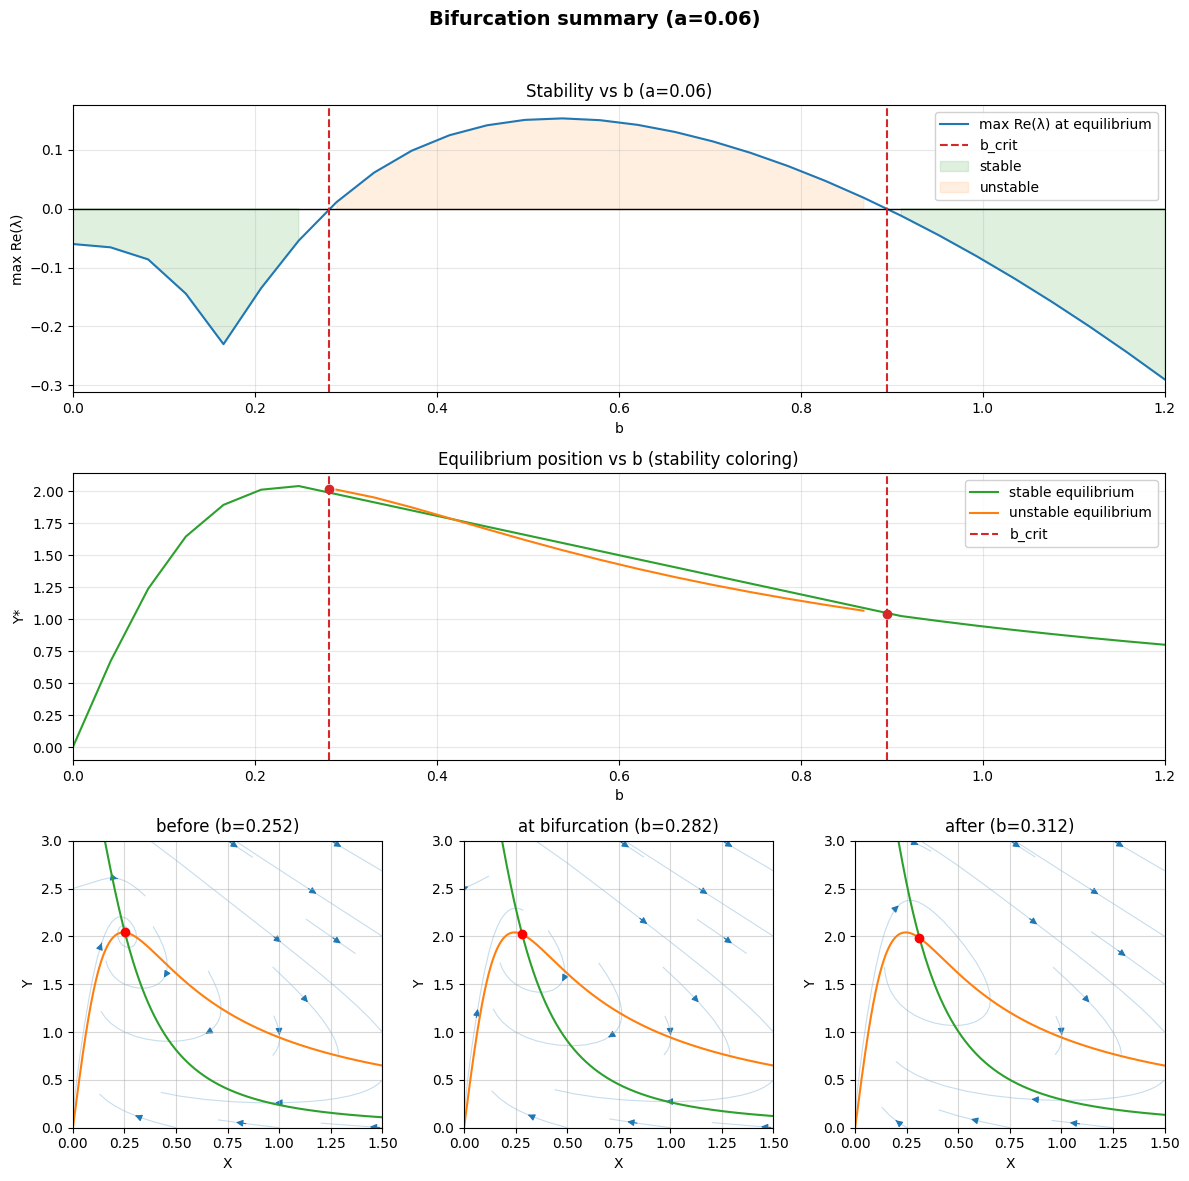

In [11]:
glucose.plot_bifurcation_summary_figures(a=0.06, xlim=(0.0, 1.2))

### Interpretation of the Bifurcation Summary Figure

The figure above shows three complementary views of how the glucose system behaves as we vary the parameter $b$ (protein production rate) while keeping $a=0.06$ fixed:

**Top panel - Stability curve**: Shows $\max(\text{Re}(\lambda))$ vs $b$. When this crosses zero (at the red vertical lines marking $b_\pm$), the equilibrium switches from stable to unstable. The green shaded region indicates where the system is stable (converges to equilibrium), while orange indicates instability (system oscillates).

**Middle panel - Equilibrium trajectory**: As $b$ changes, the equilibrium point moves along a curve in phase space. Points colored green are stable, orange are unstable. The red dots mark where bifurcations occur.

**Bottom panels - Phase portraits**: Three snapshots of the phase plane:
- **Left** (before bifurcation): The equilibrium is stable; trajectories spiral toward it
- **Middle** (at bifurcation): The equilibrium is neutrally stable; the system is at the edge between stable and oscillatory behavior
- **Right** (after bifurcation): The equilibrium is unstable; trajectories spiral away from it toward a limit cycle

This demonstrates the **Hopf bifurcation**: as $b$ increases and passes through $b_-$, the stable spiral becomes unstable and a periodic oscillation emerges.


In [15]:
b_critical = glucose.bcrit_values(a=0.06)
print(f"Critical b values: {b_critical}")

Critical b values: [np.float64(0.2818596680151331), np.float64(0.8947374629165803)]


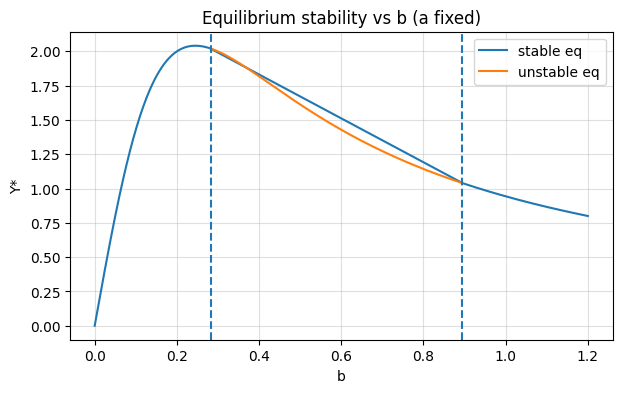

In [16]:
glucose.plot_varying_b(a=0.06)

### Phase portraits at critical bifurcation points

Now we visualize the phase portraits on both sides of the bifurcation to see how the stability of the equilibrium changes.


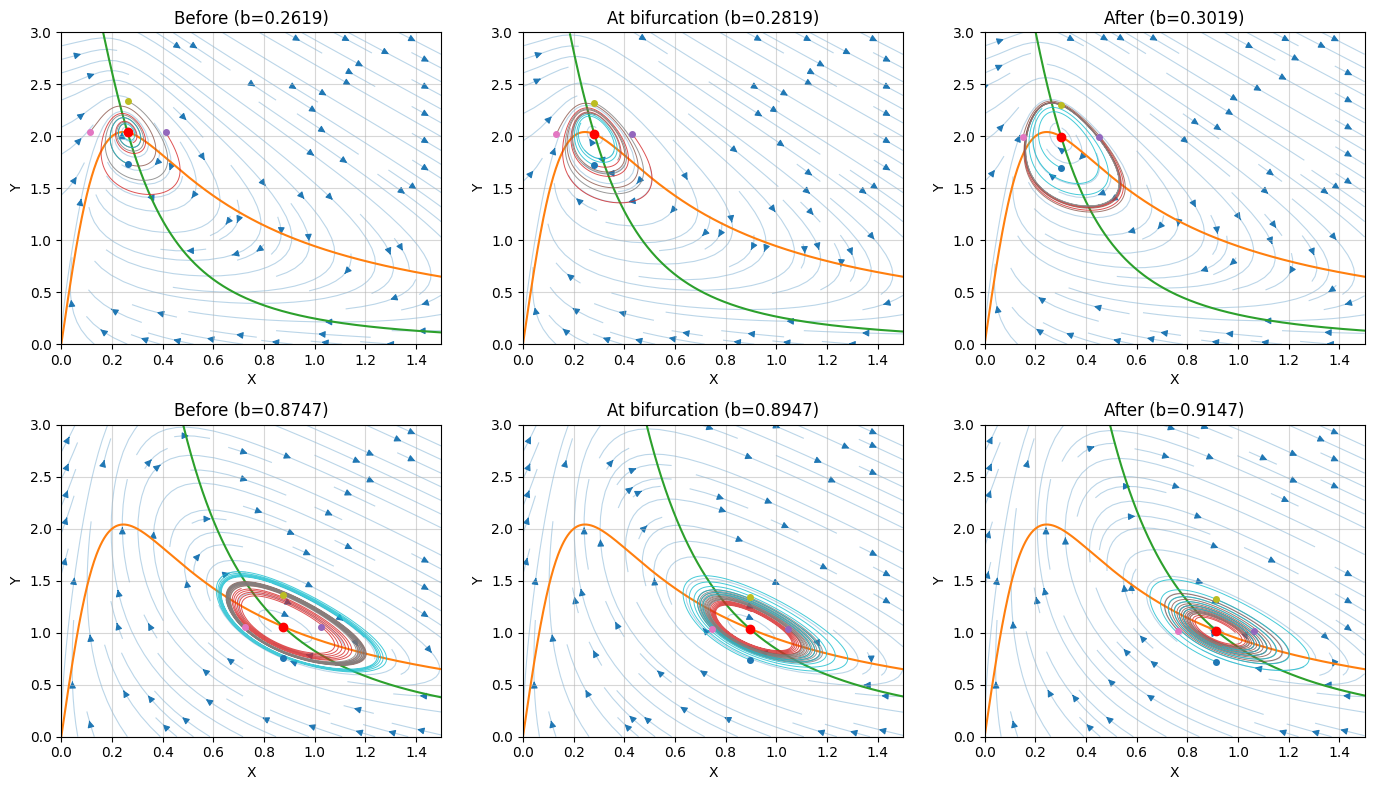

In [17]:
glucose.plot_bifurcation_phase_portraits(a=0.06, b_crit_vals=b_critical, xlim=(0, 1.5), ylim=(0, 3))

### Conclusion: Three Regimes of Glucose Dynamics

Based on the bifurcation analysis above, the glucose model exhibits three distinct dynamical regimes:

| Parameter Regime | Equilibrium Status | Dynamics | Biological Meaning |
|---|---|---|---|
| $b < b_-$ | Unstable | Oscillatory behavior | Low glucose production: irregular fluctuations |
| $b_- < b < b_+$ | **Stable** | Convergence to steady state | Normal range: homeostasis maintained |
| $b > b_+$ | Unstable | Oscillatory behavior | High glucose production: metabolic oscillations |

**Key insight**: The system exhibits a "Goldilocks zone" of stability between two critical $b$-values. This provides a mechanism for how cells regulate metabolism—operating in the stable regime ensures equilibrium, while deviations trigger oscillatory responses.


In [18]:
glucose.summarize_bifurcations_in_b(a=0.06)

BIFURCATION ANALYSIS: Glucose model with a = 0.06

Critical b-values (where τ(b) = 0):
  b_1 = 0.281860
  b_2 = 0.894737

Stability along the b-axis:
  b = 0.0100: max Re(λ) = -0.06031  →  STABLE
  b = 0.2919: max Re(λ) =  0.01413  →  UNSTABLE
  b = 0.8847: max Re(λ) =  0.00743  →  UNSTABLE
  b = 0.9947: max Re(λ) = -0.08192  →  STABLE

Equilibrium displacement:
  b = 0.0100: (X*, Y*) = (0.0100, 0.1664)
  b = 0.2562: (X*, Y*) = (0.2562, 2.0392)
  b = 0.5024: (X*, Y*) = (0.5024, 1.6082)
  b = 0.7486: (X*, Y*) = (0.7486, 1.2067)
  b = 0.9947: (X*, Y*) = (0.9947, 0.9478)


## 1.5 2D stability map in the $(a,b)$-plane

Finally we will vary both parameters, with $a\in[0,0.14]$ (and the earlier range of $b$), and produce a **2D stability diagram** showing where equilibria are stable vs unstable in parameter space. We then explain where the **bifurcation curves/boundaries** lie and what changes across them.

For varying $(a,b)$, the equilibrium remains
$$
(X_{eq},Y_{eq})=\left(b,\frac{b}{a+b^2}\right),
$$
so the key object is the Jacobian at the equilibrium. Because $\det(J_{eq})=a+b^2>0$ for $a>0$, the stability boundary is again given by
$$
\tau(a,b)=\mathrm{tr}(J_{eq})=0,
$$
which defines bifurcation curves in the $(a,b)$-plane. Plotting the sign of $\tau(a,b)$ produces a 2D stability diagram (stable vs unstable regions), and the $\tau=0$ curves are overlaid as the predicted bifurcation set.







### Extending to 2D: The Bifurcation Curves in $(a,b)$-space

From section 1.4, we know that bifurcations occur when $\tau(b) = 0$. Now we extend this to both parameters simultaneously.

**Key observation**: The critical $b$-values depend on $a$ through the relation:
$$s_\pm(a) = \frac{1 \pm \sqrt{1-8a}}{2} \quad \Rightarrow \quad b_\pm(a) = \sqrt{s_\pm(a) - a}$$

This is only real for $a \le 1/8$.

**Bifurcation surface in $(a,b)$-plane**:

The two curves $b_-(a)$ and $b_+(a)$ form the **boundaries of an "instability tongue"**:
- **Outside** the tongue ($\tau < 0$): Equilibrium is **stable**
- **Inside** the tongue ($\tau > 0$): Equilibrium is **unstable** (limit cycle exists)
- **On the boundary** ($\tau = 0$): Hopf bifurcation occurs

For $a > 1/8$: The system is either always stable or always unstable (depending on the specific $a$ value), with no bistability region.


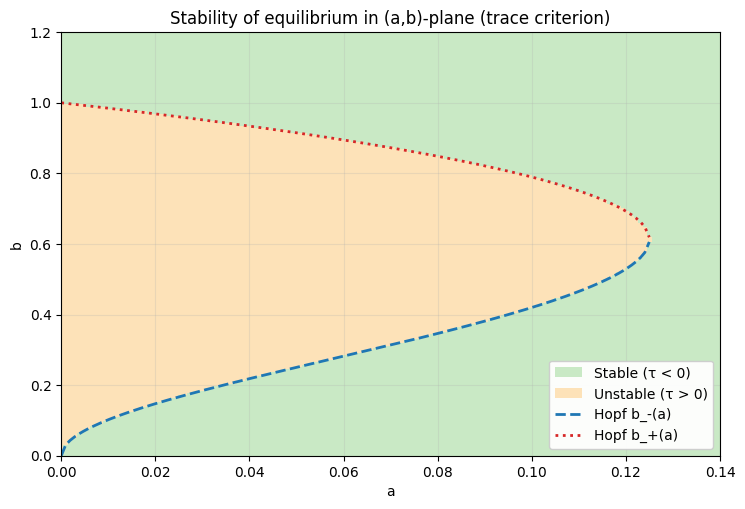

In [22]:
_ = glucose.stability_map_ab(a_min=0.0, a_max=0.14, b_min=0.0, b_max=1.2, na=150, nb=180, show_legend=True)

### Interpretation of the Enhanced Stability Map

The enhanced 2D stability map reveals the **bifurcation structure in the complete parameter space**:

**Color coding**:
- **Green regions**: Equilibrium is **stable** ($\tau < 0$) → trajectories converge to fixed point
- **White/light regions**: Equilibrium is **unstable** ($\tau > 0$) → oscillations occur (limit cycle exists)

**Black curves** ($b_-(a)$ and $b_+(a)$):
- These are the **Hopf bifurcation curves** where $\tau = 0$
- They separate stable from unstable regions
- The gap between them forms an **"instability tongue"** for small $a$ values

**Key observations**:
1. **For small $a$ (left side)**: There's a well-defined tongue of instability surrounded by stable regions. This means the system can be stable for low $b$, unstable for intermediate $b$, and unstable again for high $b$.
2. **For large $a$ (right side, $a > 1/8$)**: The curves merge and the instability tongue disappears. The system transitions to always being unstable.
3. **The annotated points** show example parameters:
   - $(a=0.06, b=0.4)$: In the stable region (equilibrium attracts trajectories)
   - $(a=0.06, b=0.2)$: In the lower unstable region (oscillations)
   - $(a=0.06, b=0.8)$: In the upper unstable region (oscillations)

This 2D perspective shows how **changing two parameters together** can produce radically different behaviors and reveals the universal bifurcation structure underlying glucose degradation dynamics.
